##### # <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 70</p>
## <p style="text-align: center;">Due: Tuesday, November 13th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Reject Option (20 Points)


For the Loss matrix given below, compute  the range of P(C1|x) where (i) It is best to call "Class 1", and (ii) where it is best to take the reject option.

![hw4-q1.png](hw4-q1.png)

Loss of C1: 0\*P(C1|x) + 4\*(1-P(C1|x))
Loss of C2: 6\*(1-P(C2|x)) + 0\*(P(C2|x)
Loss of R: 2\*(P(C1|x)) + 2\*(P(C2|x))

4\*(1-y) = 6y => 4 = 10y => y = 0.4

0.4 is the decision boundary

y = P(C1|x)

C1 bound of R:
4\*(1-y) = 2\*y + 2\*(1-y) => 4 - 4y = 2 => -2 = -4y => y = 0.5

C2 bound of R:
6y = 2\*y + 2\*(1-y) => y = 0.33

i) When to choose Class 1: P(C1|x) > 0.5

ii) When to choose reject option: P(C1|x) is between 0.33 and 0.5

# Question 2 - Concepts (15 pts)

1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart? How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value.)


2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

1) A lift curve shows the average accuracy of a classification model over an amount of bins. It is similar to an ROC curve as it evaluates correctness at different specifications (bins) and different in that it focuses more on accuracy than a ratio of TPR to FPR. An example for when it would be better to use lift over AUC is if you have a dataset where only the true positive rate or Sensitivity matters or matters far more than the TNR or specificity. This is also the case (using lift over ROC) if you are looking for accuracy with a particular sample of a population rather than the population as a whole.

2)Calibration adjusts the posterior probability so that the probability reflects the true probability of the class. The best way to do this is by sorting and binning the posteriori of the model and then observing the amount of classes in each bin. As an example if we had a bin of a C1 posteriori that belongs to [0%, 10%] and if the observed class is proporting is about 5% of the total set, than we can say the model is well-calibrated. If this is not the case  than as stated before the underlying posterior probability of the class is not truely reflceted by the model.
As long as the decision selected by the model is the most likely class, the mistake rate will be minimized. Therefore, the non-calibrated model would work for cases where we were seeking to minimize the mistake rtae or cases where trhe loss matrix is symmetric. However if the loss matrix is non-symetric, the exact posteriori matters not the greatest posteriori. If you had a two-class model with the loss as followed(from text),(predicted as 1, true as 1) = -1; (predicted as 1, true as 2) = 3; (predicted as 2, true as 1) = 1; (predicted as 2, true as 2) = 0, its decision boundary would be near 0.6. For posteriori where P(C1|X) > 0.6 when uncalibrated, but where 0.5 < P(C1|X) < 0.6 after calibration, this model will make mistakes and therfore fail to minimize loss. 

# Question 3 - MNIST Classification (20 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Logistic Regression, Naive Bayes, and MLP. The code below loads the dataset, splits it into training and testing sets, and extracts the images containing either 8 or 9. The modules you will need from scikit-learn are loaded for you.

1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.

2. (6 pts) Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)

3. (6 pts) Report the area under the ROC curve (AUC) and the accuracy for each model.

4. (6 pts)  For each of the 3 models, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the data points in the test set. 

5. (2 pts) What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models? 

In [2]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

num_train = 60000
idxs_perm = np.random.permutation(X.shape[0])
idxs_train = idxs_perm[:num_train]
idxs_test = idxs_perm[num_train:]

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
X_train = X[idxs_train]
y_train = y[idxs_train]
X_test = X[idxs_test]
y_test = y[idxs_test]

In [4]:
digits = [8, 9]
idx = (y_train == digits[0]) + (y_train==digits[1])
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-digits[0])

idx = (y_test == digits[0]) + (y_test==digits[1])
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-digits[0])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11859, 784) (11859,) (1924, 784) (1924,)


In [5]:
# Model Training - Logistic
logmodel = LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial')
logmodel.fit(X_train, y_train)

logprobs = np.round(logmodel.predict_proba(X_test),decimals=4)
logprobabilities = pd.DataFrame(logprobs, columns=['Digit 8','Digit 9'])
logprobabilities.head(5)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


,Digit 8,Digit 9
0,0.0010,0.9990
1,0.0019,0.9981
2,0.9942,0.0058
3,1.0000,0.0000
4,0.9998,0.0002


In [6]:
# Part I - Model Training
# Model Training - Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnbprobs = np.round(gnb.predict_proba(X_test),decimals=4)
gnbprobabilities = pd.DataFrame(gnbprobs, columns=['Digit 8','Digit 9'])
gnbprobabilities.head(5)

,Digit 8,Digit 9
0,0.000,1.000
1,0.000,1.000
2,0.000,1.000
3,1.000,0.000
4,0.156,0.844


In [7]:
# Model Training - MLP

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Cross validation to find best MLP size -> Optimal Size = 50
#size = [2, 10, 30, 50]
#for i in size:
#    MLP = MLPClassifier(hidden_layer_sizes = (i,),activation = 'tanh', solver = 'sgd', learning_rate='constant', 
#                       random_state=42,batch_size=30, learning_rate_init = 0.005)
#    n_folds = 5
#    kfold = KFold(n_splits = n_folds)
#    avg_rmse = 0
#    for train, test in kfold.split(X_train):
#        MLP.fit(X_train[train], y_train[train])
#        avg_rmse = avg_rmse + np.sqrt(mean_squared_error(y_train[test], MLP.predict(X_train[test])))
#    print 'Average RMSE for ' + str(i) + ' hidden layers is: ' + str(avg_rmse/n_folds)

MLP = MLPClassifier(hidden_layer_sizes = (50,),activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42,batch_size=30, learning_rate_init = 0.005)
MLP.fit(X_train, y_train)

mlpprobs = np.round(MLP.predict_proba(X_test),decimals=4)
mlpprobabilities = pd.DataFrame(mlpprobs, columns=['Digit 8','Digit 9'])
mlpprobabilities.head(5)

,Digit 8,Digit 9
0,0.0001,0.9999
1,0.0000,1.0000
2,0.9995,0.0005
3,0.9999,0.0001
4,1.0000,0.0000


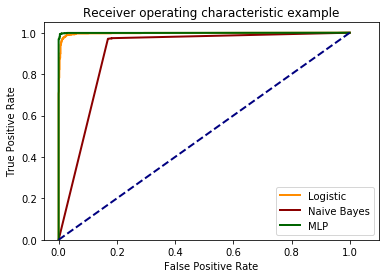

In [8]:
# Part II - ROC Curves

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, logprobabilities['Digit 9'].values)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnbprobabilities['Digit 9'].values)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, mlpprobabilities['Digit 9'].values)

plt.figure()
lw = 2
plt.plot(fpr_log, tpr_log, color='darkorange',
         lw=lw, label='Logistic')
plt.plot(fpr_gnb, tpr_gnb, color='darkred',
         lw=lw, label='Naive Bayes')
plt.plot(fpr_mlp, tpr_mlp, color='darkgreen',
         lw=lw, label='MLP')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [9]:
# Part III - AUROC and Accuracy

from sklearn.metrics import (confusion_matrix, accuracy_score)

print('AUROC of Logistic Model: ' + str(roc_auc_score(y_test, logprobabilities['Digit 9'].values)))
print('Accuracy of Logistic Model: ' + str(accuracy_score(y_test, logmodel.predict(X_test))))
print('AUROC of Naive Bayes Model: ' + str(roc_auc_score(y_test, gnbprobabilities['Digit 9'].values)))
print('Accuracy of Naive Bayes Model: ' + str(accuracy_score(y_test, gnb.predict(X_test))))
print('AUROC of MLP Model: ' + str(roc_auc_score(y_test, mlpprobabilities['Digit 9'].values)))
print('Accuracy of MLP Model: ' + str(accuracy_score(y_test, MLP.predict(X_test))))

AUROC of Logistic Model: 0.9969401191708893
Accuracy of Logistic Model: 0.9797297297297297
AUROC of Naive Bayes Model: 0.9017272962360653
Accuracy of Naive Bayes Model: 0.8981288981288982
AUROC of MLP Model: 0.9991922910046213
Accuracy of MLP Model: 0.9948024948024948


Text(0, 0.5, 'MLP - Probability')

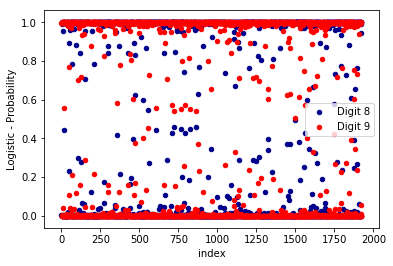

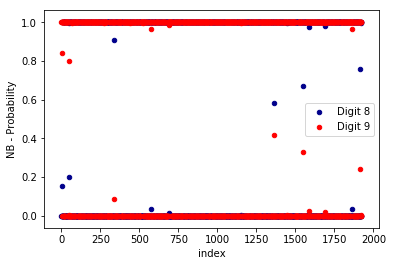

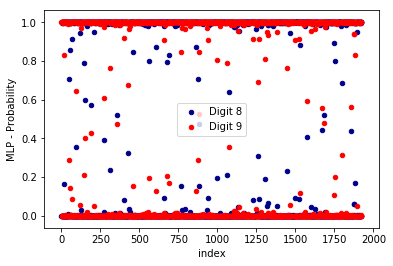

In [24]:
# Part IV - Posterior Probabilities vs Ground Truth Labels Scatter plots

ax_log = logprobabilities.reset_index().plot.scatter(x='index', y='Digit 8', color='DarkBlue', label='Digit 8')
logprobabilities.reset_index().plot.scatter(x='index', y='Digit 9', color='Red', 
                                            label='Digit 9', ax=ax_log).set_ylabel('Logistic - Probability')

ax_gnb = gnbprobabilities.reset_index().plot.scatter(x='index', y='Digit 8', color='DarkBlue', label='Digit 8')
gnbprobabilities.reset_index().plot.scatter(x='index', y='Digit 9', color='Red', 
                                            label='Digit 9', ax=ax_gnb).set_ylabel('NB - Probability')

ax_mlp = mlpprobabilities.reset_index().plot.scatter(x='index', y='Digit 8', color='DarkBlue', label='Digit 8')
mlpprobabilities.reset_index().plot.scatter(x='index', y='Digit 9', color='Red', 
                                            label='Digit 9', ax=ax_mlp).set_ylabel('MLP - Probability')

### Part V

We notice that Naive Bayes is more prone to setting posterior probabilities of the classes at the two extremes. This means that it is hardly affected by threshold changes for making decisions, while the other methods are. This is why the ROC curve has such a sharp elbow for Naive Bayes.